In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

## Reproject Herschel n(H$_2$) map onto SURFING footprint

In [196]:
hd_surfing = fits.getheader('moment_maps/13CO_moment0.fits')
hd2d_herschel = fits.getheader('HGBS_perseus_hires_column_density_map.fits')

In [197]:
hd2d_surfing = hd_surfing.copy()

In [198]:
hd2d_surfing['naxis'] = 2 

for it in ['naxis3', 'pc1_1', 'pc1_2', 'pc1_3', 'pc2_1', 'pc2_2', 'pc2_3', 'pc3_1', 'pc3_2', 'pc3_3', 
           'ctype3', 'crval3', 'cdelt3', 'crpix3', 'cunit3']:
    hd2d_surfing.remove(it)
    
hd2d_surfing.remove('history', remove_all=True)

In [199]:
hd2d_ngc1333 = hd2d_surfing.copy()

hd2d_ngc1333['btype'] = 'H2 column density'
hd2d_ngc1333['bunit'] = 'H2.cm^-2'

In [200]:
# hd2d_herschel

In [201]:
from reproject import reproject_interp

In [202]:
hdu_herschel = fits.open('HGBS_perseus_hires_column_density_map.fits')[0]

In [203]:
nh2_ngc1333, footprint = reproject_interp(hdu_herschel, hd2d_ngc1333)

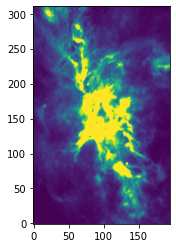

In [204]:
plt.imshow(nh2_ngc1333, origin='lower', vmin=1e21, vmax=1e22)

#### write out reprojected map

In [205]:
fits.writeto('column_density_NGC1333_repro.fits', nh2_ngc1333, hd2d_ngc1333, overwrite=True)

## Find filaments

In [206]:
from fil_finder import FilFinder2D

In [207]:
import astropy.units as u

In [208]:
nh2_hdu = fits.open('column_density_NGC1333_repro.fits')[0]

In [209]:
nh2_arr = nh2_hdu.data
nh2_hd = nh2_hdu.header

In [210]:
fil = FilFinder2D(nh2_hdu, distance=302*u.pc)

In [211]:
fil.preprocess_image(flatten_percent=95)

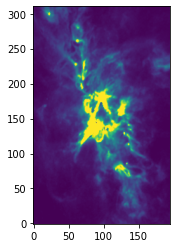

In [212]:
plt.imshow(fil.image.value, origin='lower', vmin=1e21, vmax=2e22)
# plt.imshow(fil.image.value>2e21, origin='lower')

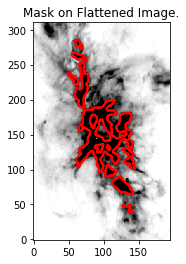

In [248]:
fil.create_mask(verbose=True, glob_thresh=7e21, size_thresh=50*u.pix**2)

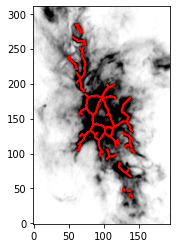

In [249]:
fil.medskel(verbose=True)

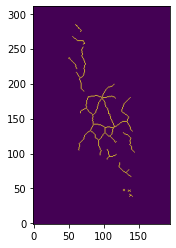

In [250]:
fil.analyze_skeletons()

plt.imshow(fil.skeleton, origin='lower')
# plt.contour(fil.skeleton_longpath, colors='r')

In [252]:
fil.filaments

In [253]:
fil1 = fil.filaments[0]
fil2 = fil.filaments[1]
fil3 = fil.filaments[2]
fil4 = fil.filaments[3]
fil5 = fil.filaments[4]
fil6 = fil.filaments[5]
fil7 = fil.filaments[6]
fil8 = fil.filaments[7]
fil9 = fil.filaments[8]
fil10 = fil.filaments[9]
fil11 = fil.filaments[10]

In [218]:
# fil1.branch_properties['pixels']

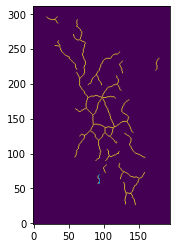

In [219]:
plt.imshow(fil.skeleton, origin='lower')

plt.plot(fil2.pixel_coords[1], fil2.pixel_coords[0], ',')

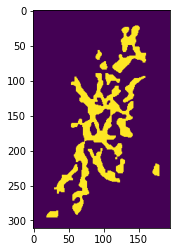

In [220]:
plt.imshow(fil.mask)

In [254]:
fits.writeto('filament_masks/filament_masks_all.fits', fil.mask, nh2_hd, overwrite=True)

In [256]:
fits.writeto('filament_masks/skeleton_all_nh2.fits', fil.skeleton, nh2_hd, overwrite=True)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


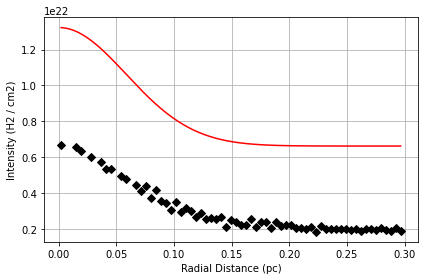

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


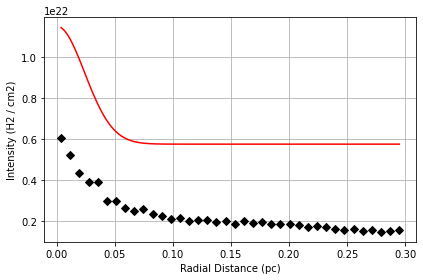

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


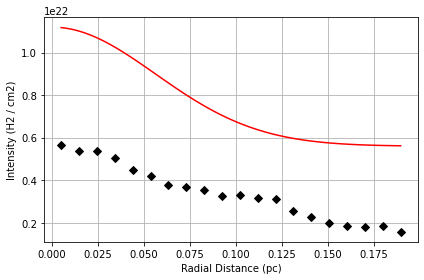

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


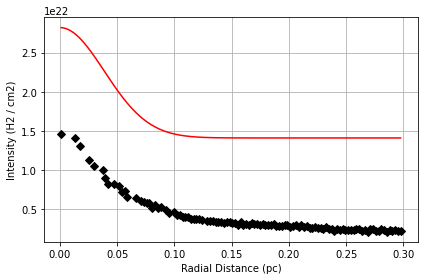

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


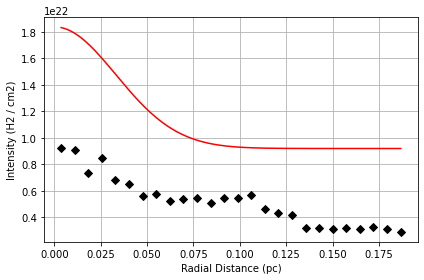

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


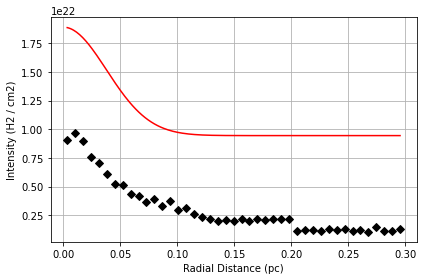

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


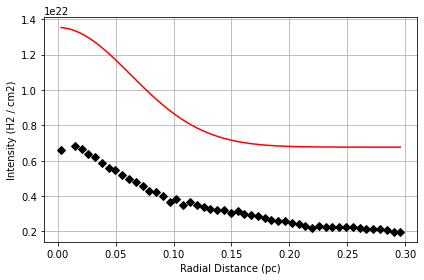

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


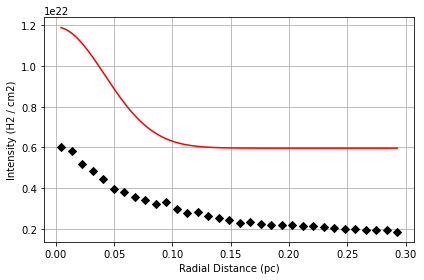

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


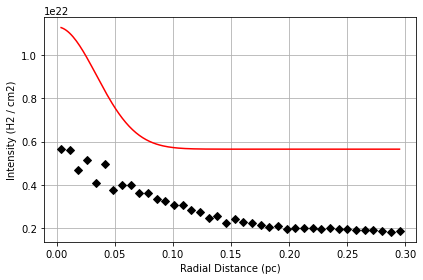

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


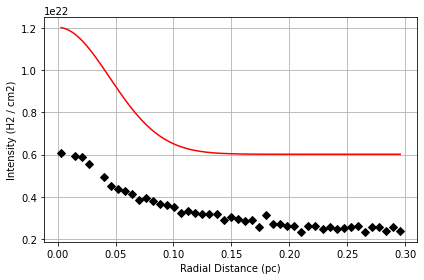

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


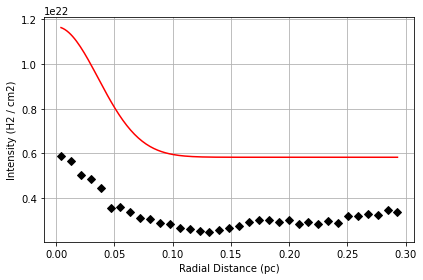

In [162]:
k = 1

for fila in [fil1, fil2, fil3, fil4, fil5, fil6, fil7, fil8, fil9, fil10, fil11]:
    fila.skeleton_analysis(fil.image, verbose=False)
    fila.width_analysis(fil.image, all_skeleton_array=fil.skeleton, beamwidth=fil.beamwidth, max_dist=0.3*u.pc)
    fila.plot_radial_profile(xunit=u.pc)
    fila.radprof_model
    
    fila.save_fits('filament_masks/mask_filament_' + str(k) + '.fits', fil.image, overwrite=True)
    k += 1

### Filament from 13CO

In [163]:
surf_13CO_hdu = fits.open('moment_maps/13CO_moment0.fits')[0]

In [164]:
surf_13CO_arr = surf_13CO_hdu.data
surf_13CO_hd = surf_13CO_hdu.header

In [257]:
fil_13CO = FilFinder2D(surf_13CO_hdu, distance=302*u.pc)

In [258]:
fil_13CO.preprocess_image(flatten_percent=95)

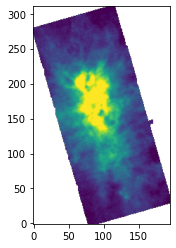

In [259]:
plt.imshow(fil_13CO.image.value, origin='lower', vmin=2, vmax=20)
# plt.imshow(fil.image.value>2e21, origin='lower')

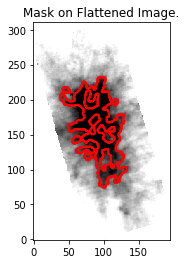

In [260]:
fil_13CO.create_mask(verbose=True, glob_thresh=10, size_thresh=50*u.pix**2)

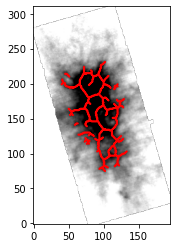

In [261]:
fil_13CO.medskel(verbose=True)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


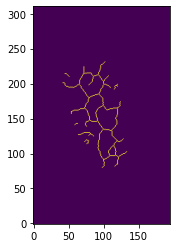

In [262]:
fil_13CO.analyze_skeletons()

plt.imshow(fil_13CO.skeleton, origin='lower')
# plt.contour(fil.skeleton_longpath, colors='r')

In [178]:
# fil.filaments

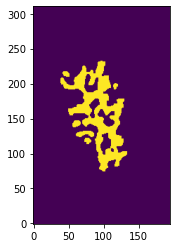

In [263]:
plt.imshow(fil_13CO.mask, origin='lower')

In [180]:
fits.writeto('filament_masks/filament_masks_13CO.fits', fil_13CO.mask, surf_13CO_hd, overwrite=True)

In [264]:
fits.writeto('filament_masks/skeleton_all_13CO.fits', fil_13CO.skeleton, surf_13CO_hd, overwrite=True)

### Filament from C18O

In [181]:
surf_C18O_hdu = fits.open('moment_maps/C18O_moment0.fits')[0]

In [182]:
surf_C18O_arr = surf_C18O_hdu.data
surf_C18O_hd = surf_C18O_hdu.header

In [265]:
fil_C18O = FilFinder2D(surf_C18O_hdu, distance=302*u.pc)

In [266]:
fil_C18O.preprocess_image(flatten_percent=95)

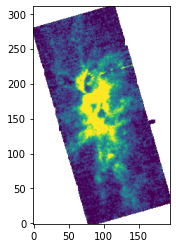

In [267]:
plt.imshow(fil_C18O.image.value, origin='lower', vmin=0, vmax=3)
# plt.imshow(fil.image.value>2e21, origin='lower')

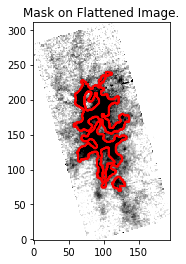

In [268]:
fil_C18O.create_mask(verbose=True, glob_thresh=1.5, size_thresh=50*u.pix**2)

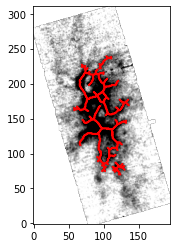

In [269]:
fil_C18O.medskel(verbose=True)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/fil_finder/filament.py:361: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


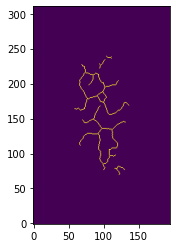

In [270]:
fil_C18O.analyze_skeletons()

plt.imshow(fil_C18O.skeleton, origin='lower')
# plt.contour(fil.skeleton_longpath, colors='r')

In [193]:
# fil.filaments

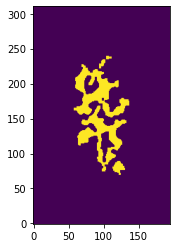

In [271]:
plt.imshow(fil_C18O.mask, origin='lower')

In [195]:
fits.writeto('filament_masks/filament_masks_C18O.fits', fil_C18O.mask, surf_C18O_hd, overwrite=True)

In [272]:
fits.writeto('filament_masks/skeleton_all_C18O.fits', fil_C18O.skeleton, surf_C18O_hd, overwrite=True)

### Filament from NH3

In [347]:
nh3_hdu = fits.open('GAS_nh3_maps/NGC1333_NH3_11_DR1_rebase3_mom0_QA_trim.fits')[0]

In [348]:
nh3_arr = nh3_hdu.data
nh3_hd = nh3_hdu.header

In [349]:
fil_nh3 = FilFinder2D(nh3_hdu, distance=302*u.pc)

In [350]:
fil_nh3.preprocess_image(flatten_percent=95)

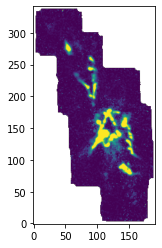

In [351]:
plt.imshow(fil_nh3.image.value, origin='lower', vmin=0, vmax=3)
# plt.imshow(fil.image.value>2e21, origin='lower')

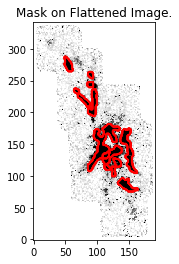

In [357]:
fil_nh3.create_mask(verbose=True, glob_thresh=0.5, size_thresh=50*u.pix**2)

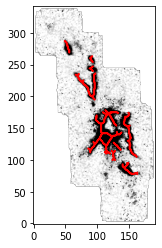

In [358]:
fil_nh3.medskel(verbose=True)

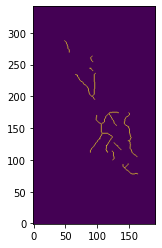

In [359]:
fil_nh3.analyze_skeletons()

plt.imshow(fil_nh3.skeleton, origin='lower')
# plt.contour(fil.skeleton_longpath, colors='r')

In [193]:
# fil.filaments

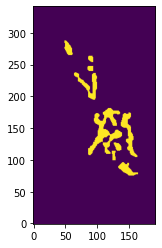

In [360]:
plt.imshow(fil_nh3.mask, origin='lower')

In [361]:
fits.writeto('filament_masks/filament_masks_nh3.fits', fil_nh3.mask, nh3_hd, overwrite=True)

In [362]:
fits.writeto('filament_masks/skeleton_all_nh3.fits', fil_nh3.skeleton, nh3_hd, overwrite=True)

### Skeletons of individual filaments

In [330]:
k = 1

for fila in [fil1, fil2, fil3, fil4, fil5, fil6, fil7, fil8, fil9, fil10, fil11]:
    
    skel = np.zeros(nh2_arr.shape)
    
    x_list = fila.pixel_coords[0]
    y_list = fila.pixel_coords[1]
    
    for i in range(x_list.shape[0]):
        skel[x_list[i], y_list[i]] = 1
        
    fits.writeto('filament_masks/skeleton_fila_' + str(k) + '.fits', skel, nh2_hd, overwrite=True)
        
    k += 1

### Dilate to filament width

In [274]:
from scipy import ndimage

In [327]:
connect_prelim = np.zeros((7,7))
connect_prelim[3,3] = 1 

connect = ndimage.binary_dilation(connect_prelim)
connect = ndimage.binary_dilation(connect)
connect = ndimage.binary_dilation(connect).astype(int)

In [303]:
# connect = ndimage.generate_binary_structure(2, 1)

In [332]:
for i in range(1,12):
    skel = fits.getdata('filament_masks/skeleton_fila_' + str(i) +'.fits')
    fila = ndimage.binary_dilation(skel, structure=connect).astype(int)
    fits.writeto('filament_masks/mask_fila_' + str(i) +'.fits', fila, nh2_hd, overwrite=True)

### separate central hub

In [336]:
fila_hub = fits.getdata('filament_masks/mask_fila_6.fits')

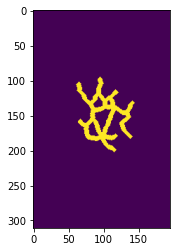

In [337]:
plt.imshow(fila_hub)

In [341]:
mask = ndimage.binary_dilation(fila_hub, structure=ndimage.generate_binary_structure(2,2))

for i in range(10):
    mask = ndimage.binary_dilation(mask, structure=ndimage.generate_binary_structure(2,2))

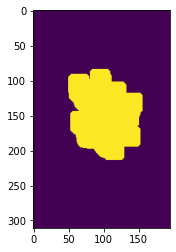

In [342]:
plt.imshow(mask)

In [343]:
hub_hdu = fits.PrimaryHDU(data=nh2_ngc1333*mask, header=nh2_hd)

In [345]:
fil_hub = FilFinder2D(hub_hdu, distance=302*u.pc)

In [346]:
fil_hub.preprocess_image(flatten_percent=95)

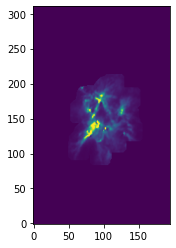

In [364]:
plt.imshow(fil_hub.image.value, origin='lower', vmin=1e21, vmax=7e22)
# plt.imshow(fil.image.value>2e21, origin='lower')

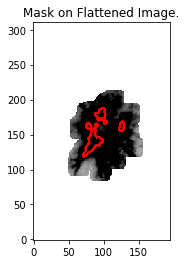

In [373]:
fil_hub.create_mask(verbose=True, glob_thresh=2.5e22, size_thresh=50*u.pix**2)

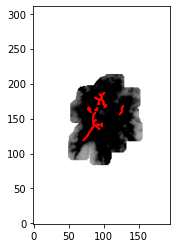

In [374]:
fil_hub.medskel(verbose=True)

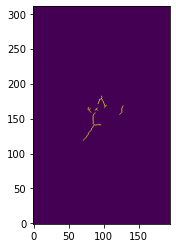

In [375]:
fil_hub.analyze_skeletons()

plt.imshow(fil_hub.skeleton, origin='lower')
# plt.contour(fil.skeleton_longpath, colors='r')

In [380]:
fil_hub.skeleton.shape

(311, 195)

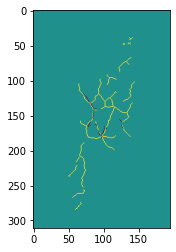

In [384]:
plt.imshow(fil.skeleton - fil_hub.skeleton)

In [376]:
fil_hub.filaments

In [253]:
fil1 = fil.filaments[0]
fil2 = fil.filaments[1]
fil3 = fil.filaments[2]
fil4 = fil.filaments[3]
fil5 = fil.filaments[4]
fil6 = fil.filaments[5]
fil7 = fil.filaments[6]
fil8 = fil.filaments[7]
fil9 = fil.filaments[8]
fil10 = fil.filaments[9]
fil11 = fil.filaments[10]

In [218]:
# fil1.branch_properties['pixels']

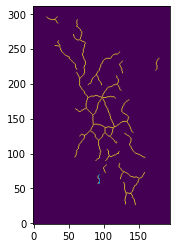

In [219]:
plt.imshow(fil.skeleton, origin='lower')

plt.plot(fil2.pixel_coords[1], fil2.pixel_coords[0], ',')

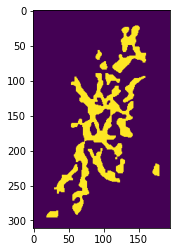

In [220]:
plt.imshow(fil.mask)

In [254]:
fits.writeto('filament_masks/filament_masks_all.fits', fil.mask, nh2_hd, overwrite=True)

In [256]:
fits.writeto('filament_masks/skeleton_all_nh2.fits', fil.skeleton, nh2_hd, overwrite=True)